In [8]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
np.random.seed(seed=1)
X_min = 4
X_max = 30
X_n = 16
X = 5 + 25*np.random.rand(X_n) #X(入力データ)の生成
Prm_c = [170, 108, 0.2] #生成パラメータ
T = Prm_c[0] - Prm_c[1]*np.exp(-Prm_c[2]*X) + 4*np.random.randn(X_n) #T(目標データ)の生成
np.savez('ch5_data.npz', X=X, X_min=X_min, X_max=X_max, X_n=X_n, T=T)

In [2]:
print(X)

[15.42555012 23.00811234  5.00285937 12.55831432  8.66889727  7.30846487
  9.65650528 13.63901818 14.91918686 18.47041835 15.47986286 22.13048751
 10.11130624 26.95293591  5.68468983 21.76168775]


In [4]:
print(T)

[170.91013145 160.67559882 129.00206616 159.70139552 155.46058905
 140.56134369 153.65466385 159.42939554 164.70423898 169.64527574
 160.71257522 173.28709855 159.31193249 171.51757345 138.9570433
 165.8744074 ]


In [6]:
print(np.round(X, 2))
print(np.round(T, 2))

[15.43 23.01  5.   12.56  8.67  7.31  9.66 13.64 14.92 18.47 15.48 22.13
 10.11 26.95  5.68 21.76]
[170.91 160.68 129.   159.7  155.46 140.56 153.65 159.43 164.7  169.65
 160.71 173.29 159.31 171.52 138.96 165.87]


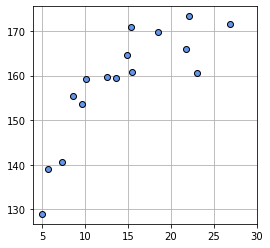

In [9]:
#データグラフの表示
plt.figure(figsize=(4,4))
plt.plot(X, T, marker='o', linestyle='None', markeredgecolor='black', color='cornflowerblue')
plt.xlim(X_min, X_max)
plt.grid(True)
plt.show()
#しばらくこのデータセットを用いる

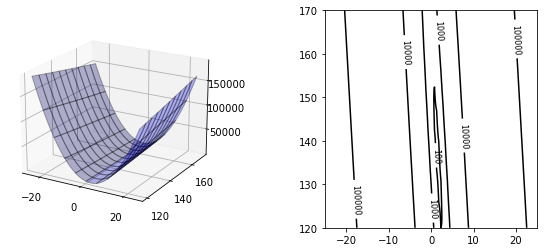

In [11]:
#二乗誤差関数(平均二乗誤差(MSE), 二乗和誤差(SSE))
from mpl_toolkits.mplot3d import Axes3D

#平均誤差関数
def mse_line(x, t, w):
    y = w[0]*x + w[1]
    mse = np.mean((y - t)**2)
    return mse

#計算
xn = 100
w0_range = [-25, 25]
w1_range = [120, 170]
w0 = np.linspace(w0_range[0], w0_range[1], xn)
w1 = np.linspace(w1_range[0], w1_range[1], xn)
ww0, ww1 = np.meshgrid(w0, w1)
J = np.zeros((len(w0), len(w1)))
for i0 in range(len(w0)):
    for i1 in range(len(w1)):
        J[i1, i0] = mse_line(X, T, (w0[i0],w1[i1]))

#図示
plt.figure(figsize=(9.5,4))
plt.subplots_adjust(wspace=0.5)

ax = plt.subplot(1, 2, 1, projection='3d')
ax.plot_surface(ww0, ww1, J, rstride=10, cstride=10, alpha=0.3, color='blue', edgecolor='black')
ax.set_xticks([-20, 0, 20])
ax.set_yticks([120, 140, 160])
ax.view_init(20, -60)

plt.subplot(1, 2, 2)
cont = plt.contour(ww0, ww1, J, 30, colors='black', levels=[100, 1000, 10000, 100000])
cont.clabel(fmt='%d',fontsize=8)
plt.show()

In [12]:
#w[0],w[1]を求める方法
#勾配法

#平均二乗誤差の勾配
def dmse_line(x, t, w):
    y = w[0]*x + w[1]
    d_w0 = 2*np.mean((y-t)*x)
    d_w1 = 2*np.mean(y-t)
    return d_w0, d_w1

d_w = dmse_line(X, T, [10, 165])
print(np.round(d_w,1))

[5046.3  301.8]


 繰り返し回数 13820
W=[1.539947, 136.176160]
dMSE=[-0.005794, 0.099991]
MSE=49.027452


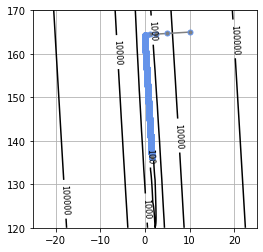

In [13]:
#勾配法
def fit_line_num(x, t):
    w_init = [10.0, 165.0]
    alpha = 0.001 #学習率
    tau_max = 100000 #繰り返しの最大数
    eps = 0.1 #繰り返しをやめる勾配の絶対値の閾値
    w_hist = np.zeros([tau_max, 2])
    w_hist[0, :] = w_init
    for tau in range(1, tau_max):
        dmse = dmse_line(x, t, w_hist[tau-1])
        w_hist[tau, 0] = w_hist[tau-1, 0] - alpha*dmse[0]
        w_hist[tau, 1] = w_hist[tau-1, 1] - alpha*dmse[1]
        if max(np.absolute(dmse)) < eps: #終了判定
            break
    w0 = w_hist[tau, 0] #tauはforループの中だけでは？
    w1 = w_hist[tau, 1]
    w_hist = w_hist[:tau, :]
    return w0, w1, dmse, w_hist

#メイン
plt.figure(figsize=(4,4))
#MSEの等高線表示
wn = 100
w0_range = [-25, 25]
w1_range = [120, 170]
w0 = np.linspace(w0_range[0], w0_range[1], wn)
w1 = np.linspace(w1_range[0], w1_range[1], wn)
ww0, ww1 = np.meshgrid(w0, w1)
J = np.zeros((len(w0), len(w1)))
for i0 in range(wn):
    for i1 in range(wn):
        J[i1,i0] = mse_line(X, T, (w0[i0], w1[i1]))
cont = plt.contour(ww0, ww1, J, 30, colors='black', levels=(100, 1000, 10000, 100000))
cont.clabel(fmt='%1.0f', fontsize=8)
plt.grid(True)

#勾配法呼び出し
w0, w1, dMSE, W_history = fit_line_num(X, T)

#結果表示
print(' 繰り返し回数 {0}'.format(W_history.shape[0]))
print('W=[{0:.6f}, {1:.6f}]'.format(w0, w1))
print('dMSE=[{0:.6f}, {1:.6f}]'.format(dMSE[0], dMSE[1]))
print('MSE={0:.6f}'.format(mse_line(X, T, [w0, w1])))
plt.plot(W_history[:, 0], W_history[:, 1], '.-', color='gray', markersize=10, markeredgecolor='cornflowerblue')
plt.show()

w0=1.540, w1=136.176
SD=7.002 cm


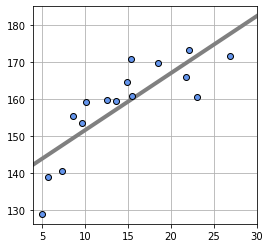

In [17]:
#確認

#直線の表示
def show_line(w):
    xb = np.linspace(X_min, X_max, 100)
    y = w[0]*xb + w[1]
    plt.plot(xb, y, color=(.5, .5, .5), linewidth=4)
    
#main
plt.figure(figsize=(4,4))
W = np.array([w0, w1])
mse = mse_line(X, T, W)
print("w0={0:.3f}, w1={1:.3f}".format(w0, w1))
print("SD={0:.3f} cm".format(np.sqrt(mse)))
show_line(W)
plt.plot(X, T, marker='o', linestyle='None', color='cornflowerblue', markeredgecolor='black')
plt.xlim(X_min, X_max)
plt.grid(True)
plt.show()

w0=1.540, w1=136.176
SD=7.002 cm


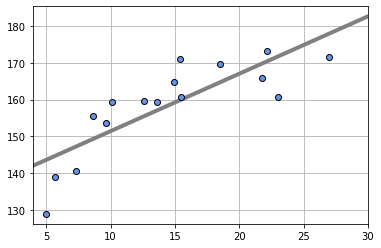

In [19]:
#勾配法は数値解→一次元線形回帰の場合は解析解も存在
def fit_line(x, t):
    mx = np.mean(x)
    mt = np.mean(t)
    mtx = np.mean(t*x)
    mxx = np.mean(x*x)
    w0 = (mtx - mt * mx)/(mxx - mx**2)
    w1 = mt - w0*mx
    return np.array([w0, w1])

#main
W = fit_line(X, T)
print("w0={0:.3f}, w1={1:.3f}".format(w0, w1))
print("SD={0:.3f} cm".format(np.sqrt(mse)))
show_line(W)
plt.plot(X, T, marker='o', linestyle='None', color='cornflowerblue', markeredgecolor='black')
plt.xlim(X_min, X_max)
plt.grid(True)
plt.show()

In [12]:
#二次元線形回帰モデル
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
datafile = np.load('ch5_data.npz')
print(datafile.files)
X = datafile['X']
X_min = datafile['X_min']
X_max = datafile['X_max']
X_n = datafile['X_n']
T = datafile['T']

#二次元データの生成
X0 = X
X0_min = 5
X0_max = 30
np.random.seed(seed=1)
X1 = 23*(T/100)**2 + 2*np.random.randn(X_n)
X1_min = 40
X1_max = 75

['X', 'X_min', 'X_max', 'X_n', 'T']


In [5]:
print(np.round(X0, 2))
print(np.round(X1, 2))
print(np.round(T, 2))

[15.43 23.01  5.   12.56  8.67  7.31  9.66 13.64 14.92 18.47 15.48 22.13
 10.11 26.95  5.68 21.76]
[70.43 58.15 37.22 56.51 57.32 40.84 57.79 56.94 63.03 65.69 62.33 64.95
 57.73 66.89 46.68 61.08]
[170.91 160.68 129.   159.7  155.46 140.56 153.65 159.43 164.7  169.65
 160.71 173.29 159.31 171.52 138.96 165.87]


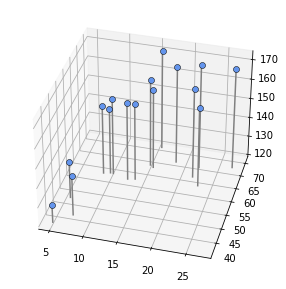

In [11]:
#二次元データの表示
def show_data2(ax, x0, x1, t):
    for i in range(len(x0)):
        ax.plot([x0[i], x0[i]], [x1[i], x1[i]], [120, t[i]], color='gray')
        
    ax.plot(x0, x1, t, 'o', color='cornflowerblue', markeredgecolor='black', markersize=6, markeredgewidth=0.5)
    ax.view_init(elev=35, azim=-75)
    
#main
plt.figure(figsize=(6, 5))
ax = plt.subplot(1,1,1,projection='3d')
show_data2(ax, X0, X1, T)
plt.show()

SD=12.88 cm


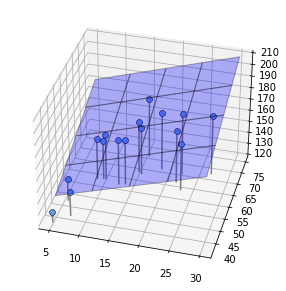

In [13]:
#面の表示
def show_plane(ax, w):
    px0 = np.linspace(X0_min, X0_max, 5)
    px1 = np.linspace(X1_min, X1_max, 5)
    px0, px1 = np.meshgrid(px0, px1)
    y = w[0]*px0 + w[1]*px1 + w[2]
    ax.plot_surface(px0, px1, y, rstride=1, cstride=1, alpha=0.3, color='blue', edgecolor='black')
    
#面のMSE
def mse_plane(x0, x1, t, w):
    y = w[0]*x0 + w[1]*x1 + w[2]
    mse = np.mean((y-t)**2)
    return mse

#main
plt.figure(figsize=(6, 5))
ax = plt.subplot(1, 1, 1, projection='3d')
W = [1.5, 1, 90] #適当に係数を決めた
show_plane(ax, W)
show_data2(ax, X0, X1, T)
mse = mse_plane(X0, X1, T, W)
print("SD={0:.2f} cm".format(np.sqrt(mse)))
plt.show()

 w0 = 1.5
 w1 = 0.9
 w2 = 90.0
SD=6.19 cm


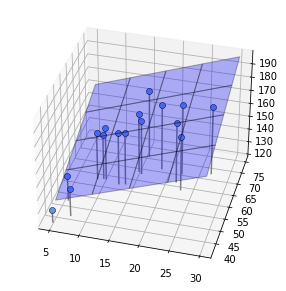

In [40]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

#勾配法
#勾配の定義
def dmse_line(x0, x1, t, w):
    y = w[0]*x0 + w[1]+x1 + w[2]
    dw0 = 2*np.mean((y-t)*x0)
    dw1 = 2*np.mean((y-t)*x1)
    dw2 = 2*np.mean((y-t))
    return dw0, dw1, dw2

#機械学習
def fit_line_num(x0, x1, t):
    w_init = [1.5, 1.0, 90.0]
    alpha = 0.000001 #学習率：収束性にもろに関係→実際にいじると分かる
    tau_max = 100 #繰り返しの最大数：収束性に関係→実際にいじると分かる
    eps = 0.1 #繰り返しをやめる勾配の絶対値の閾値
    w_hist = np.zeros([tau_max, 3])
    w_hist[0, :] = w_init
    for tau in range(1, tau_max):
        dmse = dmse_line(x0, x1, t, w_hist[tau-1])
        w_hist[tau, 0] = w_hist[tau-1, 0] - alpha*dmse[0]
        w_hist[tau, 1] = w_hist[tau-1, 1] - alpha*dmse[1]
        w_hist[tau, 2] = w_hist[tau-1, 2] - alpha*dmse[2]
        if max(np.absolute(dmse)) < eps: #終了判定
            break
    w0 = w_hist[tau, 0]
    w1 = w_hist[tau, 1]
    w2 = w_hist[tau, 2]
    w_hist = w_hist[:tau, :]
    return w0, w1, w2, dmse, w_hist

#面の表示
def show_plane(ax, w):
    px0 = np.linspace(X0_min, X0_max, 5)
    px1 = np.linspace(X1_min, X1_max, 5)
    px0, px1 = np.meshgrid(px0, px1)
    y = w[0]*px0 + w[1]*px1 + w[2]
    ax.plot_surface(px0, px1, y, rstride=1, cstride=1, alpha=0.3, color='blue', edgecolor='black')
    
#面のMSE
def mse_plane(x0, x1, t, w):
    y = w[0]*x0 + w[1]*x1 + w[2]
    mse = np.mean((y-t)**2)
    return mse

#main
w0, w1, w2, dMSE, W_history = fit_line_num(X0, X1, T)
print(' w0 = {0:.1f}'.format(w0))
print(' w1 = {0:.1f}'.format(w1))
print(' w2 = {0:.1f}'.format(w2))
plt.figure(figsize=(6, 5))
ax = plt.subplot(1, 1, 1, projection='3d')
W = [w0, w1, w2] #適当に係数を決めた
show_plane(ax, W)
show_data2(ax, X0, X1, T)
mse = mse_plane(X0, X1, T, W)
print("SD={0:.2f} cm".format(np.sqrt(mse)))
plt.show()
#収束しない問題に対する解決案→パラメータを少し動かした後のMSEを評価して悪化した場合には学習率を下げるとか？

w0=1.1, w1=0.9, w2=93.0
SD=3.86 cm


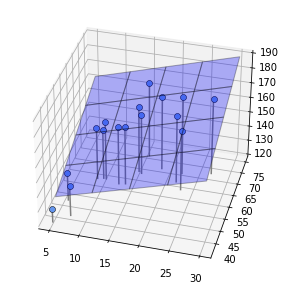

In [41]:
#解析解による手法
def fit_plane(x0, x1, t):
    c_tx0 = np.mean(t*x0) - np.mean(t)*np.mean(x0)
    c_tx1 = np.mean(t*x1) - np.mean(t)*np.mean(x1)
    c_x0x1 = np.mean(x0*x1) - np.mean(x0)*np.mean(x1)
    v_x0 = np.var(x0)
    v_x1 = np.var(x1)
    w0 = (c_tx1*c_x0x1 - v_x1*c_tx0)/(c_x0x1**2 -v_x0 * v_x1)
    w0 = (c_tx0*c_x0x1 - v_x0*c_tx1)/(c_x0x1**2 -v_x0 * v_x1)
    w2 = -w0*np.mean(x0) - w1*np.mean(x1)+np.mean(t)
    return np.array([w0, w1, w2])

#main
plt.figure(figsize=(6, 5))
ax = plt.subplot(1, 1, 1, projection='3d')
W = fit_plane(X0, X1, T)
print("w0={0:.1f}, w1={1:.1f}, w2={2:.1f}".format(W[0], W[1], W[2]))
show_plane(ax, W)
show_data2(ax, X0, X1, T)
mse = mse_plane(X0, X1, T, W)
print("SD={0:.2f} cm".format(np.sqrt(mse)))
plt.show()
#解析解強すぎる

線形基底関数モデル

['X', 'X_min', 'X_max', 'X_n', 'T']


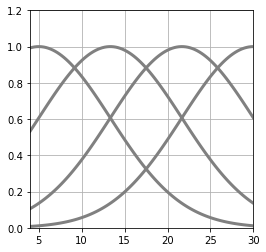

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

datafile = np.load('ch5_data.npz')
print(datafile.files)
X = datafile['X']
X_min = datafile['X_min']
X_max = datafile['X_max']
X_n = datafile['X_n']
T = datafile['T']

#gauss関数を定義
def gauss(x, mu, s):
    return np.exp(-(x-mu)**2/(2*s**2))

#main
M = 4
plt.figure(figsize=(4, 4))
mu = np.linspace(5, 30, M)
s = mu[1] - mu[0]
xb = np.linspace(X_min, X_max, 100)
for j in range(M):
    y = gauss(xb, mu[j], s)
    plt.plot(xb, y, color='gray', linewidth=3)
plt.grid(True)
plt.xlim(X_min, X_max)
plt.ylim(0, 1.2)
plt.show()

W=[29.4 75.7  2.9 98.3 54.9]
SD=3.98 cm


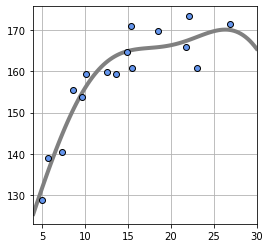

In [3]:
#線形基底関数モデル
#基底関数を用いたfit関数を準備
def gauss_func(w, x):
    m = len(w) - 1
    mu = np.linspace(5, 30, m)
    s = mu[1] - mu[0]
    y = np.zeros_like(x) #xと同じサイズのzero行列を生成
    for j in range(m):
        y = y + w[j] * gauss(x, mu[j], s)
    y = y + w[m]
    return y

#線形基底関数モデルMSE
def mse_gauss_func(x, t, w):
    y = gauss_func(w, x)
    mse = np.mean((y-t)**2)
    return mse

#線形基底関数モデル 解析解
def fit_gauss_func(x, t, m):
    mu = np.linspace(5, 30, m)
    s = mu[1] - mu[0]
    n = x.shape[0]
    phi = np.ones((n, m+1))
    for j in range(m):
        phi[:, j] = gauss(x, mu[j], s)
    phi_T = np.transpose(phi)
    b = np.linalg.inv(phi_T.dot(phi))
    c = b.dot(phi_T)
    w = c.dot(t)
    return w

#gauss基底関数表示
def show_gauss_func(w):
    xb = np.linspace(X_min, X_max, 100)
    y = gauss_func(w, xb)
    plt.plot(xb, y, c=[.5, .5, .5], lw=4)
    
#main
plt.figure(figsize=(4, 4))
M = 4
W = fit_gauss_func(X, T, M)
show_gauss_func(W)
plt.plot(X, T, marker='o', linestyle='None', color='cornflowerblue', markeredgecolor='black')
plt.xlim(X_min, X_max)
plt.grid(True)
mse = mse_gauss_func(X, T, W)
print('W=' + str(np.round(W, 1)))
print('SD={0:.2f} cm'.format(np.sqrt(mse)))
plt.show()

基底関数の数Mはどのように決定するの？

オーバーフィッティング問題

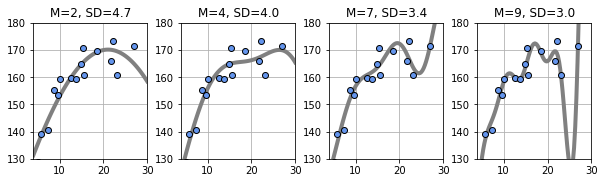

In [4]:
plt.figure(figsize=(10, 2.5))
plt.subplots_adjust(wspace=0.3)
M = [2, 4, 7, 9]
for i in range(len(M)):
    plt.subplot(1, len(M), i + 1)
    W = fit_gauss_func(X, T, M[i])
    show_gauss_func(W)
    plt.plot(X, T, marker='o', linestyle='None', color='cornflowerblue', markeredgecolor='black')
    plt.xlim(X_min, X_max)
    plt.grid(True)
    plt.ylim(130, 180)
    mse =mse_gauss_func(X, T, W)
    plt.title("M={0:d}, SD={1:.1f}".format(M[i], np.sqrt(mse)))
plt.show()

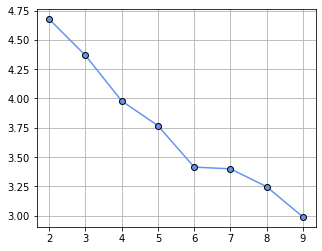

In [8]:
plt.figure(figsize=(5, 4))
M = range(2, 10)
mse2 = np.zeros(len(M))
for i in range(len(M)):
    W = fit_gauss_func(X, T, M[i])
    mse2[i] = np.sqrt(mse_gauss_func(X, T, W))
plt.plot(M, mse2, marker='o', color='cornflowerblue', markeredgecolor='black')
plt.grid(True)
plt.show()

ホールドアウト検証：訓練データとテストデータに分ける